In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [56]:
sw = pd.read_csv('./data/starwars.csv')

In [57]:
sw

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human
...,...,...,...,...,...,...,...,...,...,...,...
82,Rey,NaN,NaN,brown,light,hazel,NaN,female,feminine,NaN,Human
83,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,masculine,NaN,Human
84,BB8,NaN,NaN,none,none,black,NaN,none,masculine,NaN,Droid
85,Captain Phasma,NaN,NaN,unknown,unknown,unknown,NaN,NaN,NaN,NaN,NaN


#### 범주형 변수 : frequency 계산 가능

name, hair_color, skin_color

#### 연속형 변수 : 평균, 표준 편차, min/max 등 수치 계산 가능
height, mass, birth_year

In [5]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
name          87 non-null object
height        81 non-null float64
mass          59 non-null float64
hair_color    82 non-null object
skin_color    87 non-null object
eye_color     87 non-null object
birth_year    43 non-null float64
sex           83 non-null object
gender        83 non-null object
homeworld     77 non-null object
species       83 non-null object
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


In [6]:
sw.describe()

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [7]:
sw.describe(include = np.object)

,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Darth Vader,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


In [8]:
print('Hair color: ', sw['hair_color'].unique())


Hair color:  ['blond' nan 'none' 'brown' 'brown, grey' 'black' 'auburn, white'
 'auburn, grey' 'white' 'grey' 'auburn' 'blonde' 'unknown']


In [9]:
print("총 데이터 개수: ", sw.shape[0]*sw.shape[1])

총 데이터 개수:  957


In [11]:
print('총 결측치 수: {} = 전체 데이터의 {:.2f}%'.format(sw.isnull().sum().sum(), (sw.isnull().sum().sum()*100/(sw.shape[0]*sw.shape[1]))))

총 결측치 수: 105 = 전체 데이터의 10.97%


In [13]:
print("스타워즈에 등장하는 등장인물 수: ", sw['name'].nunique())

스타워즈에 등장하는 등장인물 수:  87


In [15]:
print("스타워즈에 등장하는 종족 수: ", sw['species'].nunique())

스타워즈에 등장하는 종족 수:  37


* 스타워즈 캐릭터의 성별 비율은?
* 성별에 따른 캐릭터 신장의 분포는?
* 가장 무거운 캐릭터와 가장 가벼운 캐릭터는?
* 스타워즈 캐릭터의 키와 몸무게는 상관관계를 가질까?

In [16]:
sw.isnull().any(axis=0)

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
sex            True
gender         True
homeworld      True
species        True
dtype: bool

In [17]:
sw.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [22]:
sw['height'].fillna(0, inplace=True)
sw['mass'].fillna(0, inplace=True)
sw.isnull().sum(axis=0)

name           0
height         0
mass           0
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [24]:
print(sw[sw['sex'] == 'none'])
print(sw[sw['sex'].isnull()])

      name  height   mass hair_color   skin_color  eye_color  birth_year  \
1    C-3PO   167.0   75.0        NaN         gold     yellow       112.0   
2    R2-D2    96.0   32.0        NaN  white, blue        red        33.0   
7    R5-D4    97.0   32.0        NaN   white, red        red         NaN   
21   IG-88   200.0  140.0       none        metal        red        15.0   
72  R4-P17    96.0    0.0       none  silver, red  red, blue         NaN   
84     BB8     0.0    0.0       none         none      black         NaN   

     sex     gender homeworld species  
1   none  masculine  Tatooine   Droid  
2   none  masculine     Naboo   Droid  
7   none  masculine  Tatooine   Droid  
21  none  masculine       NaN   Droid  
72  none   feminine       NaN   Droid  
84  none  masculine       NaN   Droid  
              name  height  mass hair_color skin_color eye_color  birth_year  \
36        Ric Olié   183.0   0.0      brown       fair      blue         NaN   
39   Quarsh Panaka   183.0 

In [25]:
sw['sex'][(sw['sex'] == 'none')] = 'robot'
print('Sex: ', sw['sex'].unique())

Sex:  ['male' 'robot' 'female' 'hermaphroditic' nan]


C:\Users\lee45\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
sw['gender'].value_counts()

masculine    66
feminine     17
Name: gender, dtype: int64

In [27]:
sw['sex'].value_counts()

male              60
female            16
robot              6
hermaphroditic     1
Name: sex, dtype: int64

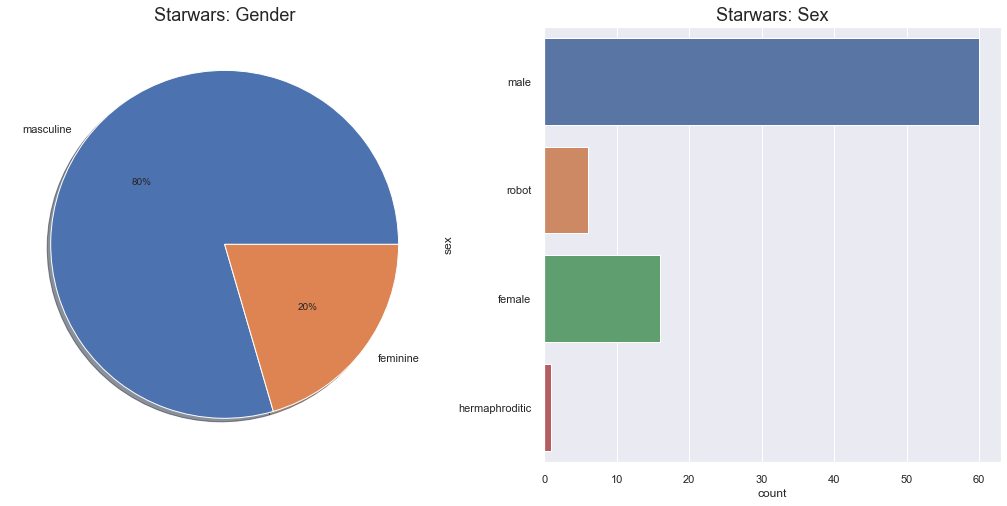

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))

sw['gender'].value_counts().plot.pie(ax=ax[0], autopct='%1.0f%%', shadow=True)
ax[0].set_title('Starwars: Gender', size=18)
ax[0].set_ylabel('')

sns.countplot(y='sex', data=sw, ax=ax[1])
ax[1].set_title('Starwars: Sex', size=18)

plt.show()

In [31]:
sw['height'].describe()

count     87.000000
mean     162.333333
std       55.671726
min        0.000000
25%      164.000000
50%      178.000000
75%      190.500000
max      264.000000
Name: height, dtype: float64

In [32]:
print("skewness: %f" %sw['height'].skew()) #왜도
print("Kurtosis: %f" %sw['height'].kurt()) #첨도

skewness: -1.760878
Kurtosis: 2.927697


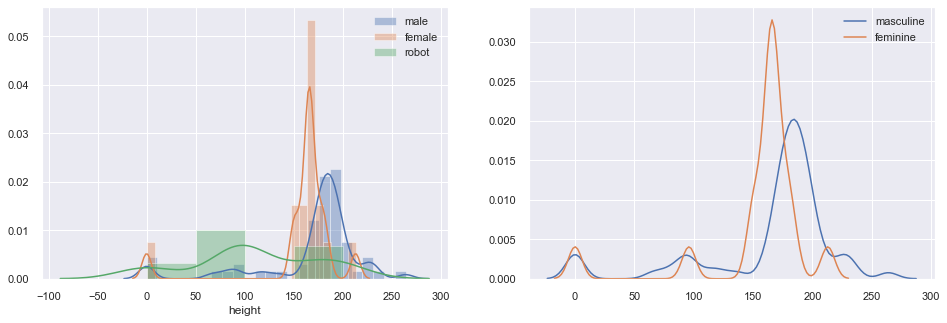

In [33]:
fig, ax  = plt.subplots(1, 2, figsize=(16,5))

sns.distplot(sw[sw['sex'] == 'male']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'female']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'robot']['height'], ax=ax[0])
ax[0].legend(['male','female','robot'])

sns.kdeplot(sw[sw['gender'] == 'masculine']['height'], ax=ax[1])
sns.kdeplot(sw[sw['gender'] == 'feminine']['height'], ax=ax[1])
ax[1].legend(['masculine', 'feminine'])
plt.show()

In [34]:
notz = sw[sw['mass'] != 0]

In [35]:
min(notz['mass'])

15.0

In [37]:
print("{}의 몸무게가 {} (으)로 가장 가볍다 ".format(notz[notz['mass'] == min(notz['mass'])]['name'].values, min(notz['mass'])))
print("{}의 몸무게가 {} (으)로 가장 무겁다 ".format(notz[notz['mass'] == max(notz['mass'])]['name'].values, max(notz['mass'])))

['Ratts Tyerell']의 몸무게가 15.0 (으)로 가장 가볍다 
['Jabba Desilijic Tiure']의 몸무게가 1358.0 (으)로 가장 무겁다 


In [38]:
weight = sw[['species', 'mass']].groupby(['species'], as_index=True).mean()

In [40]:
weight

,mass
species,
Aleena,15.000000
Besalisk,102.000000
Cerean,82.000000
Chagrian,0.000000
Clawdite,55.000000
Droid,46.500000
Dug,40.000000
Ewok,20.000000
Geonosian,80.000000


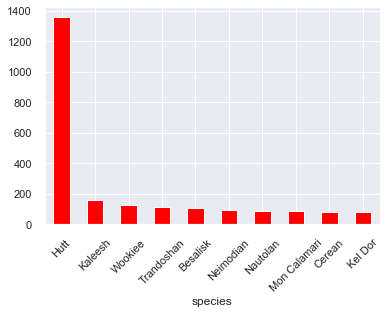

In [41]:
weight['mass'].sort_values(ascending=False).head(10).plot.bar(color='red')
plt.xticks(rotation=45)
plt.show()

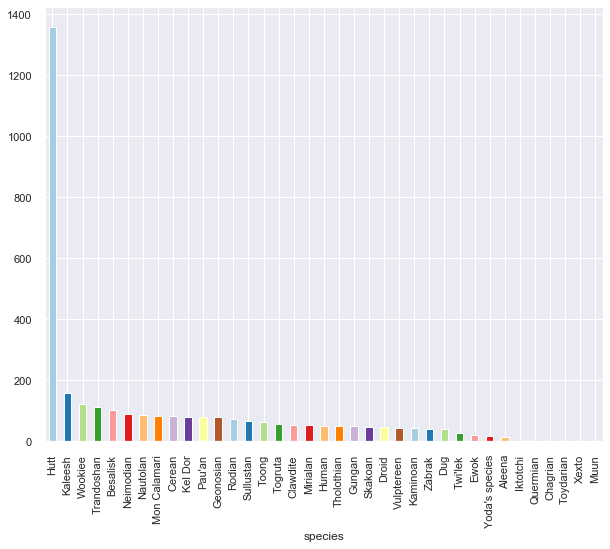

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

colors = sns.color_palette("Paired", len(weight['mass']))

g = weight['mass'].sort_values(ascending=False).plot.bar(color = colors)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

In [51]:
out1 = sw['species'].isin(['Hutt'])
out2 = sw['mass'].isin(['0'])

sw[~out1][~out2].shape

C:\Users\lee45\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


(58, 11)

C:\Users\lee45\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


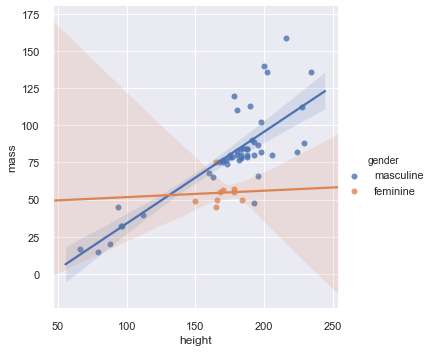

In [55]:
sns.lmplot(data=sw[~out1][~out2], x='height', y='mass', hue='gender')
sns.set_style(style='darkgrid')

plt.show()